In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
import numpy.linalg as LA

In [2]:
#Задаём константы
tol = 0.001
la = 13 # l у основания
lb = 13 # l у основания
lc = 4.25 #L
ld = 4.25 #L
d = 12
work_space = []

In [3]:
#     D1=(
#         2 * (-1*(x+d/2)/(y)) * ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#         )**2
#         -4*(1 + (x+d/2)**2/(y**2) ) * ( 
#                                         ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#                                         )**2 -la**2
#                                      ) 
#     D2=(
#         2 * (-1*(x-d/2)/(y)) * ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#         )**2
#         -4*(1 + (x-d/2)**2/(y**2) ) * ( 
#                                         ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )
#                                         )**2 -la**2
#                                      )     

In [4]:
#задаём функцию, работающую, как чёрный ящик, которая принимает точку и d и говорит, попали ли мы в рабочую область
def is_inside(x, y, d):
    D1=(2 * (-1*(x+d/2)/(y)) * ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x+d/2)**2)/(y**2) ) * ( ( (x+d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2) 
    D2=(2 * (-1*(x-d/2)/(y)) * ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) ))**2 - 4*(1 + ((x-d/2)**2)/(y**2) ) * ( ( (x-d/2)**2/(2*y) + y/2 + (la**2-lc**2)/(2*y) )**2 - la**2)     
    if D1 >= 0 and D2 >= 0:
        work_space.append([x,y])
        return 1
    return 0

In [5]:
# окружности в питоне легче всего задавать через сферические координаты
# тета меняется от 0 до 2pi
# theta = np.linspace(0, 2*np.pi, 100)

# x1 = la*np.cos(theta)
# x2 = la*np.sin(theta)
# x3 = lc*np.cos(theta)
# x4 = lc*np.sin(theta)
# x5 = la*np.cos(theta)+d
# x6 = la*np.sin(theta)
# x7 = lc*np.cos(theta)+d
# x8 = lc*np.sin(theta)

#задаю сетку для расчёта рабочей области
gr_x = np.linspace(-20, 20, 300)
gr_y = np.linspace(-20, 20, 300)
# gr_x = np.linspace(-(la+lc), la+lc+d, 250)
# gr_y = np.linspace(-(la+lc), la+lc+d, 250)
gr_X, gr_Y = np.meshgrid(gr_x,gr_y)
    
# fig, ax = plt.subplots(1)
# ax.plot(x1, x2)
# ax.plot(x3, x4)
# ax.plot(x5, x6)
# ax.plot(x7, x8)
# ax.set_aspect(1)
# print('Robot work area:')
# plt.show()

# plt.scatter(gr_X, gr_Y, color = 'black')
# plt.show()

In [6]:
#функция подсчёта площади
def count_area_new(d_iter):
    S_square=len(gr_x)*len(gr_y) #50 000
    number_of_points = len(gr_x)*len(gr_y) #50 000
    number_inside = 0
    for i in range(len(gr_x)):
        for j in range(len(gr_y)):
            number_inside+=is_inside(gr_x[i], gr_y[j], d_iter)
    S=(S_square*number_inside/number_of_points)/2 # /2 из-за того, что области на графике две, но в реальности она одна
    return S

In [7]:
count_area_new(d)

5108.0

In [8]:
#work_space

In [9]:
# #d_iter = 1*l1min*2
# d_iter = 0
# step = 1
# d_array = []
# while d_iter < 1*la*2+1*lc*2:
#     d_array.append([d_iter, count_area_new(d_iter)])
#     d_iter+=step

In [10]:
# максимальная рабочая область
# max(d_array)

In [11]:
# d_array

In [ ]:
# plt.plot(*zip(*d_array))

Robot work area:


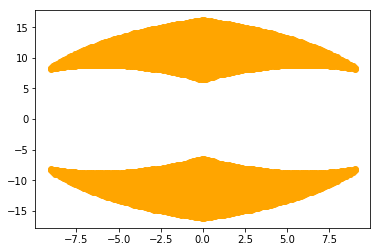

In [12]:
# отрисовка рабочей области
print('Robot work area:')
plt.scatter(*zip(*work_space), color = 'orange')
plt.show()

In [13]:
#генерирую всевозможные углы
theta1 = np.linspace(0, 2*np.pi, 60)
theta2 = np.linspace(0, 2*np.pi, 60)
phi1 = np.linspace(0, 2*np.pi, 60)
phi2 = np.linspace(0, 2*np.pi, 60)
sing1 = []
sing2 = []

In [14]:
#функция, определяющая сингулярность
# def dj(t1,t2,p1,p2):
#     if p1==t1 or p1==t1+np.pi:
#         sing.append([t1,t2,p1,p2])
#         return 0
#     if p2==t2 or p2==t2+np.pi:
#         sing.append([t1,t2,p1,p2])
#         return 0
#     if p1==p2 or p2==p1+np.pi:
#         sing.append([t1,t2,p1,p2])
#         return 0
#     return 0

def dj(t1,t2,p1,p2):
    if np.abs(p1-p2) < tol:
        sing1.append([t1,t2,p1,p2])
        return 0
    if (p2-p1-np.pi) < tol:
        sing2.append([t1,t2,p1,p2])
        return 0
    return 0

In [15]:
#перебираю все комбинации углов на удовлетворение условиям сингулярности
for i in range(len(theta1)):
    for j in range(len(theta2)):
        for k in range(len(phi1)):
            for m in range(len(phi2)):
                dj(theta1[i], theta2[j], phi1[k], phi2[m])

In [16]:
sing2

[[0.0, 0.0, 0.0, 0.10649466622338281],
 [0.0, 0.0, 0.0, 0.21298933244676563],
 [0.0, 0.0, 0.0, 0.31948399867014843],
 [0.0, 0.0, 0.0, 0.42597866489353126],
 [0.0, 0.0, 0.0, 0.5324733311169141],
 [0.0, 0.0, 0.0, 0.6389679973402969],
 [0.0, 0.0, 0.0, 0.7454626635636797],
 [0.0, 0.0, 0.0, 0.8519573297870625],
 [0.0, 0.0, 0.0, 0.9584519960104453],
 [0.0, 0.0, 0.0, 1.0649466622338282],
 [0.0, 0.0, 0.0, 1.171441328457211],
 [0.0, 0.0, 0.0, 1.2779359946805937],
 [0.0, 0.0, 0.0, 1.3844306609039765],
 [0.0, 0.0, 0.0, 1.4909253271273595],
 [0.0, 0.0, 0.0, 1.5974199933507423],
 [0.0, 0.0, 0.0, 1.703914659574125],
 [0.0, 0.0, 0.0, 1.8104093257975078],
 [0.0, 0.0, 0.0, 1.9169039920208906],
 [0.0, 0.0, 0.0, 2.0233986582442736],
 [0.0, 0.0, 0.0, 2.1298933244676563],
 [0.0, 0.0, 0.0, 2.236387990691039],
 [0.0, 0.0, 0.0, 2.342882656914422],
 [0.0, 0.0, 0.0, 2.4493773231378047],
 [0.0, 0.0, 0.0, 2.5558719893611874],
 [0.0, 0.0, 0.0, 2.66236665558457],
 [0.0, 0.0, 0.0, 2.768861321807953],
 [0.0, 0.0, 0.0

In [17]:
len(sing2)

11070000

In [18]:
len(sing1)

216000

In [ ]:
# for i in range(len(sing)):
#     if sing[i][0]==sing[i][2]:
#         print ("0: "+str(sing[i][0]))
#         print ("2: "+str(sing[i][2]))

Robot singularity area:


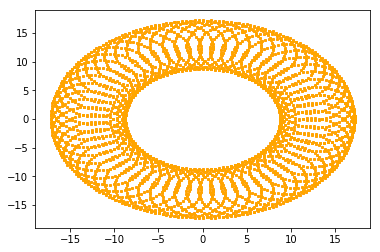

In [19]:
#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#с чистыми уравнениями связи
sing_xy1 = []
aa = []
for i in range(len(sing1)):
    aa.append(np.abs(lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][2]) - ( d + lc*np.cos(sing1[i][1])+la*np.cos(sing1[i][3])) ))
#     if np.abs(lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][2]) - ( d + lc*np.cos(sing1[i][1])+la*np.cos(sing1[i][3])) ) <= tol:
#         print("aaaaa")
#         if np.abs(lc*np.sin(sing1[i][0])+la*np.sin(sing1[i][2]) - lc*np.sin(sing1[i][1])-la*np.sin(sing1[i][3]) ) <= tol:
#             print("bbbbb")
    sing_xy1.append( [ lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][2]), lc*np.sin(sing1[i][0])+la*np.sin(sing1[i][2])] )
    
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.5)
plt.show()

In [20]:
np.min(aa)

3.506023543373761

In [ ]:
np.cos(np.pi-0.0001)

In [ ]:
#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
#после упрощений
sing_xy1 = []
for i in range(len(sing1)):
    if np.abs(sing1[i][0] - np.pi + sing1[i][1] ) <= 0.055: #из-за погрешности заполнения теты (np.pi-3.088345320478=0.05324733311179308)
        print("aaa")
        if np.abs(2*lc*np.cos(sing1[i][0]) - d ) <= 2*lc*0.85:
            print("bbbbb")
            sing_xy1.append( [ lc*np.cos(sing1[i][0])+la*np.cos(sing1[i][2]), lc*np.sin(sing1[i][0])+la*np.sin(sing1[i][2])] )
    


Robot singularity area:


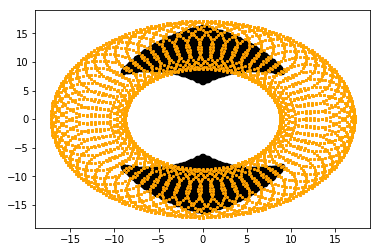

In [22]:
#строю линии сингулярности в координатах х у
print('Robot singularity area:')
plt.scatter(*zip(*work_space), color = 'black', s=20)
plt.scatter(*zip(*sing_xy1), color = 'orange', s=0.5)
#plt.savefig('C:\\Users\Andrej\Desktop\foo.png')
plt.show()

In [ ]:
output = []
trends = []

for i in range(len(sing1)):
    trends.append([sing1[i][1]])

for x in trends:
    if x not in output:
        output.append(x)
print (output)

In [ ]:
np.pi-3.088345320478

In [ ]:
import os
cwd = os.getcwd()
cwd

In [ ]:
#отсеиваю те углы, которые не подходят по условиям закрытости цепи и получаю коордитаны линий сингулярности в х и у
sing_xy = []

for i in range(len(sing)):
    if np.abs(lc*np.cos(sing[i][0])+la*np.cos(sing[i][2]) - ( d + lc*np.cos(sing[i][1])+la*np.cos(sing[i][3])) ) <= tol:
        print("asda")
        if np.abs(lc*np.sin(sing[i][0])+la*np.sin(sing[i][2]) - lc*np.sin(sing[i][1])-la*np.sin(sing[i][3]) ) <= tol:
            sing_xy.append( [ lc*np.cos(sing[i][0])+la*np.cos(sing[i][2]), lc*np.sin(sing[i][0])+la*np.sin(sing[i][2])] )
            
